[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/seap-udea/multimin/blob/master/examples/multimin_quickstart.ipynb)

<p align="left"><img src="https://raw.githubusercontent.com/seap-udea/multimin/master/docs/multimin-logo-white.webp" width="600" /></p>

# MultiMin: Quickstart

This notebook provides a quick introduction to the package

## Installation and importing

If you're running this in Google Colab or need to install the package, uncomment and run the following cell:

In [1]:
try:
    from google.colab import drive
    %pip install -Uq multimin
except ImportError:
    print("Not running in Colab, skipping installation")
    %load_ext autoreload
    %autoreload 2
!mkdir -p gallery/

# Uncomment to install from GitHub (development version)
# !pip install git+https://github.com/seap-udea/MultiMin.git

Not running in Colab, skipping installation


In [2]:
import multimin as mn
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import numpy as np
np.random.seed(1)
deg = np.pi/180

import warnings
warnings.filterwarnings("ignore")


Welcome to MultiMin v0.6.3


## Distribution basics

### Univariate normal distibution

The most simple gaussians are univariate normal distributions. Let's create a distribution combining two normal distributions:

In [3]:
CMND = mn.ComposedMultiVariateNormal(
    mus=[0.0, 2.5],
    Sigmas=[1.0, 0.25],
    weights=[0.5, 0.5]
)

Now we can plot a sample of the distribution:

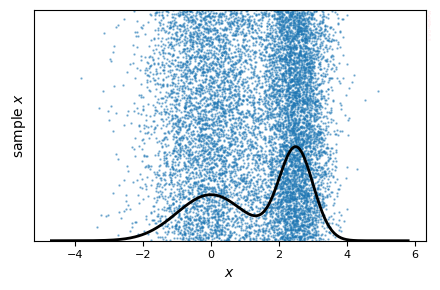

In [4]:
G = CMND.plot_sample(
    props=["x"],
    sargs=dict(s=0.5, alpha=0.5),
    figsize=3
)
plt.savefig('gallery/quickstart_univariate_sample_hist.png')

You can generate samples:

In [5]:
sample = CMND.rvs(5000)
sample[:10]

array([[ 1.2346658 ],
       [ 3.18819871],
       [-0.92121299],
       [-0.48274735],
       [-2.03678077],
       [ 2.14532057],
       [ 2.86172714],
       [-0.96293251],
       [ 0.31405467],
       [-1.99307374]])

Or calculate the pdf value:

In [6]:
CMND.pdf(1.3)

0.10807882631874657

### Multivariate distributions

The real power of `MultiMin` is to combinate multivariate normal distributions. For instante, below we compose two threevariated normal distributions:

In [7]:
weights = [0.5,0.5]
mus = [[1.0, 0.5, -0.5], [1.0, -0.5, +0.5],]
sigmas = [[1, 1.2, 2.3], [0.8, 0.2, 3.3]]
angles = [
    [10*deg, 30*deg, 20*deg],
    [-20*deg, 0*deg, 30*deg],
] 
Sigmas = mn.Stats.calc_covariance_from_rotation(sigmas, angles)
CMND = mn.ComposedMultiVariateNormal(mus=mus, weights=weights, Sigmas=Sigmas)

Let's preview the distribution

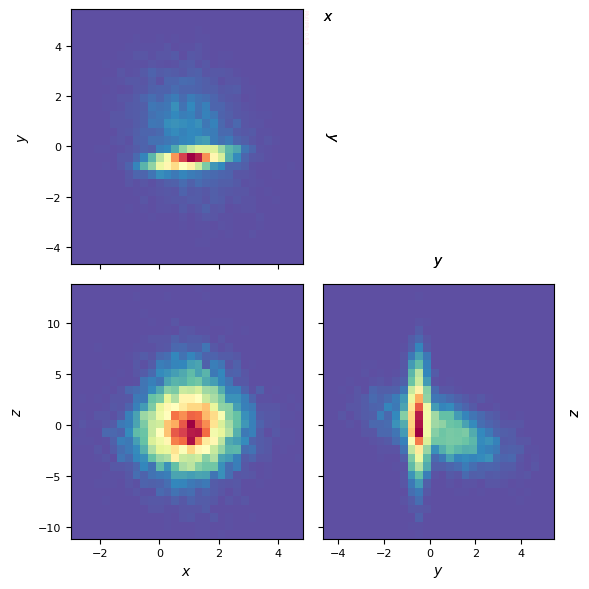

In [8]:
fig = CMND.plot_sample(
    figsize=3,
    props=["x", "y", "z"],
    hargs=dict(bins=30,cmap='Spectral_r', alpha=1)
)
plt.savefig('gallery/quickstart_3d_sample_density.png')

Another way to represent the distribution is using the so-called `DensityPlot`. For this purpose we need a sample:

In [9]:
sample = CMND.rvs(5000)

And then plot the sample:

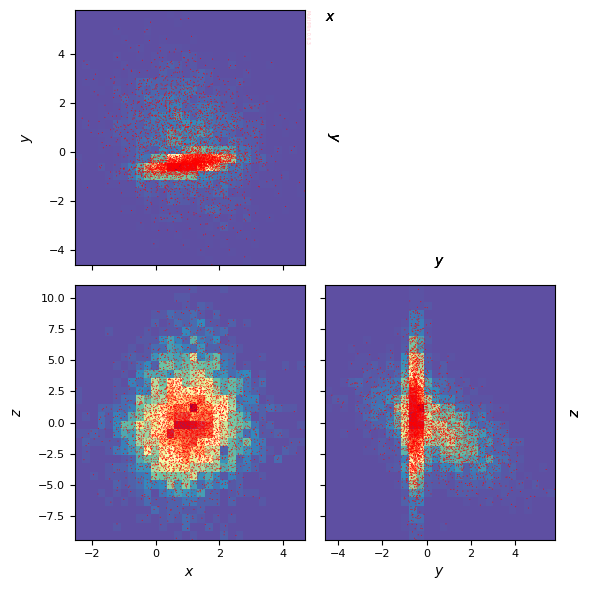

In [10]:
properties=dict(
    x=dict(label=r"$x$",range=None),
    y=dict(label=r"$y$",range=None),
    z=dict(label=r"$z$",range=None),
)

G=mn.DensityPlot(properties,figsize=3)
hargs=dict(bins=30,cmap='Spectral_r')
hist=G.plot_hist(sample,**hargs)

sargs=dict(s=0.5,edgecolor='None',color='r')
hist=G.scatter_plot(sample,**sargs)

plt.savefig('gallery/quickstart_data_density_scatter.png')


We can also show the distribution of data points in sample in 3D:

In [11]:

fig = go.Figure(
    data=go.Scatter3d(
        x=sample[:, 0],
        y=sample[:, 1],
        z=sample[:, 2],
        mode="markers",
        marker={
            "size": 2,
            "color": sample[:, 2],
            "colorscale": "Viridis",
            "showscale": False,
        },
    )
)

fig.update_layout(
    scene={
        "xaxis_title": properties["x"]["label"].replace("$", ""),
        "yaxis_title": properties["y"]["label"].replace("$", ""),
        "zaxis_title": properties["z"]["label"].replace("$", ""),
        "aspectmode": "cube",
    },
    showlegend=False,
)

from IPython.display import HTML; display(HTML(fig.to_html(include_plotlyjs='cdn')))


`DensityPlot` can also be used in the case of univariate distributions:

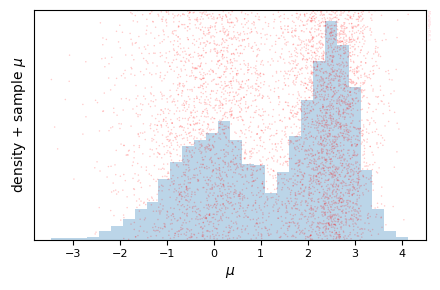

In [12]:
CMND = mn.ComposedMultiVariateNormal(
    mus=[0.0, 2.5],
    Sigmas=[1.0, 0.25],
    weights=[0.5, 0.5]
)

sample = CMND.rvs(5000)

properties=dict(
    x=dict(label=r"$\mu$",range=None),
)

G=mn.DensityPlot(properties,figsize=3)

G.plot_hist(
    sample,
    **dict(bins=30,cmap='Spectral_r', alpha=0.3),
)

sargs=dict(s=1.2,edgecolor='None',color='r')
G.scatter_plot(
    sample,
    **dict(s=1.2,edgecolor='None',color='r',alpha=0.2),
)
plt.savefig('gallery/quickstart_univariate_density_2gauss.png')

## Fittind data with CMND

### Univariate normals

The goal of `MultiMin` is to fit a CMND to a given dataset. Let's start with a univariate dataset. Although it may seem a trick, we will generate data using a CMND:

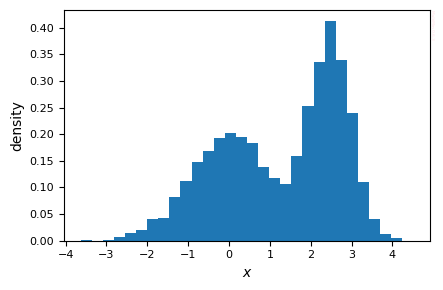

In [101]:
# Create the distribution
CMND = mn.ComposedMultiVariateNormal(
    mus=[0.0, 2.5],
    Sigmas=[1.0, 0.25],
    weights=[0.5, 0.5]
)

# Generate data
sample = CMND.rvs(10000)

# Plot the data
G = mn.DensityPlot(dict(x=dict(label=r"$x$",range=None)),figsize=3)
G.plot_hist(sample,**dict(bins=30))
plt.savefig('gallery/quickstart_univariate_histogram.png')

Let's fit it with a single Gaussian:

In [102]:
F = mn.FitCMND(ngauss=1, nvars=1)

Run the fitting procedure:

In [103]:
F.fit_data(sample, advance=True)

Iterations:
Iter 0:
	Vars: [1.2, -1.8]
	LogL/N: 1.8062815318799097
Iter 1:
	Vars: [1.2, -1.8]
	LogL/N: 1.8062814541516774
Iter 2:
	Vars: [1.2, -1.8]
	LogL/N: 1.8062814541516774


Let's plot the result of the fit:

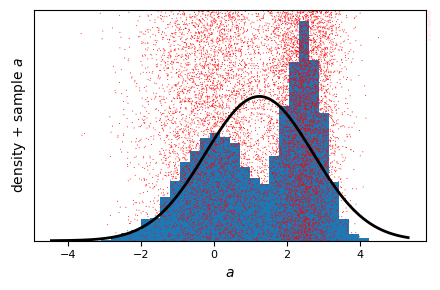

In [104]:
# Univariate: hargs → histogram of sample; fit shown as PDF
F.plot_fit(
    hargs=dict(bins=30),
    sargs=dict(s=0.5,edgecolor='None',color='r'),
    figsize=3
)
plt.savefig('gallery/quickstart_univariate_fit_1gauss.png')

Naturally, the fit is not perfect. Now we can fit with two gaussians:

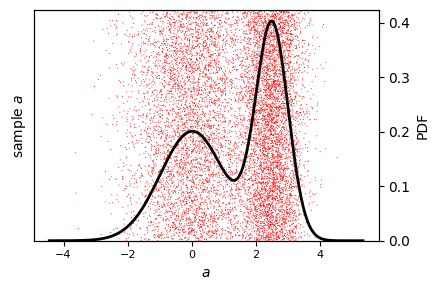

In [105]:
F = mn.FitCMND(ngauss=2, nvars=1)
F.fit_data(sample)
# Univariate: no hargs → scatter of sample; fit shown as PDF
F.plot_fit(
    sargs=dict(s=0.5, edgecolor='None', color='r'),
    figsize=3
)
plt.savefig('gallery/quickstart_univariate_fit_2gauss.png')

A visual inspection demonstrate that the fitted distribution (histogram), reproduces well the distribution of the sample points. However, a more precise comparison is required to judge the quality of the fit.

In [106]:
CMND.tabulate('distance')

,w,mu_1,sigma_1
component,,,
1,0.5,0.0,1.0
2,0.5,2.5,0.5


In [107]:
F.cmnd.tabulate('distance')

,w,mu_1,sigma_1
component,,,
2,0.501808,0.009207,0.996560
1,0.498192,2.494514,0.504152


Which confirme the result of the visual inspection.

Now you can get the function for using in external codes:

In [110]:
code, cmnd = F.cmnd.get_function()

from multimin import nmd

def cmnd(X):

    mu1 = 2.494514
    sigma1 = 0.504152
    n1 = nmd(X, mu1, sigma1)

    mu2 = 0.009207
    sigma2 = 0.99656
    n2 = nmd(X, mu2, sigma2)

    w1 = 0.498192
    w2 = 0.501808

    return (
        w1*n1
        + w2*n2
    )


And test it:

In [111]:
cmnd(0.2)

np.float64(0.19724796118352345)

### Multivariate data

We can repeat a similar set of test for the case of a multivariate data:

In [79]:
weights = [0.5,0.5]
mus = [[1.0, 0.5, -0.5], [1.0, -0.5, +0.5],]
sigmas = [[1, 1.2, 2.3], [0.8, 0.2, 3.3]]
angles = [
    [10*deg, 30*deg, 20*deg],
    [-20*deg, 0*deg, 30*deg],
] 
Sigmas = mn.Stats.calc_covariance_from_rotation(sigmas, angles)

CMND = mn.ComposedMultiVariateNormal(mus=mus, weights=weights, Sigmas=Sigmas)

sample = CMND.rvs(5000)

We can fit with only one multivariate normal:

In [80]:
F = mn.FitCMND(ngauss=1, nvars=3)
F.fit_data(sample, advance=True)

Iterations:
Iter 0:
	Vars: [1.4, 0.31, 0.15, -2, -1.5, -0.61, 0.93, 0.86, 0.15]
	LogL/N: 5.726652151299754
Iter 1:
	Vars: [1.1, 0.088, 0.079, -2, -1.9, -0.93, 0.27, 0.3, 0.19]
	LogL/N: 5.485376662884064
Iter 2:
	Vars: [1, 0.014, -0.058, -2.3, -2, -0.97, -0.27, 0.09, -0.55]
	LogL/N: 5.322867032224754
Iter 3:
	Vars: [1, -0.0015, -0.075, -2.3, -2, -0.96, -0.22, 0.083, -0.71]
	LogL/N: 5.318112166103914
Iter 4:
	Vars: [1, 0.0013, -0.074, -2.3, -2, -0.96, -0.21, 0.085, -0.71]
	LogL/N: 5.318061805832729
Iter 5:
	Vars: [1, 0.0013, -0.074, -2.3, -2, -0.96, -0.21, 0.085, -0.71]
	LogL/N: 5.318061805832729


Check the results:

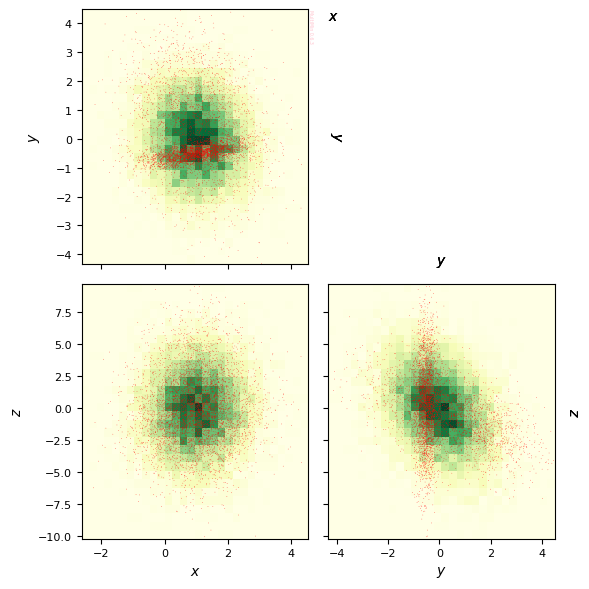

In [81]:
G=F.plot_fit(
    props=["x","y","z"],
    hargs=dict(bins=30,cmap='YlGn'),
    sargs=dict(s=0.2,edgecolor='None',color='r'),
    figsize=3
)

plt.savefig('gallery/quickstart_fit_2gauss_3d.png')


Not good. Let's try with two gaussians:

Iterations:
Iter 0:
	Vars: [0, 0, 2.3, 1.8, -2.3, 1, -0.68, 1.5, -1.6, -1.4, -0.24, -2.2, -2.7, -0.78, 0.97, 0.52, -0.18, 1.2, 0.74, 0.24]
	LogL/N: 5.667115997766183
Iter 1:
	Vars: [-1.1, -0.0076, 1.1, 1.1, -1.1, 1, -0.47, 0.3, -1.8, -1.4, -1.4, -2.2, -3.5, -0.71, -0.31, -0.05, -1.3, 1.1, 0.18, 0.051]
	LogL/N: 5.007551998011136
Iter 2:
	Vars: [-0.43, -0.0083, 0.96, 0.82, -0.83, 1.1, -0.49, 0.45, -2.2, -1.7, -1.3, -2.4, -3.7, -0.76, -0.31, 0.1, -1.3, 1.2, 0.038, 0.016]
	LogL/N: 4.902238041911772
Iter 3:
	Vars: [-0.17, -0.008, 0.98, 0.61, -0.68, 1, -0.5, 0.44, -2.2, -1.7, -1.3, -2.4, -3.7, -0.75, -0.41, 0.16, -1.3, 1.2, 0.021, 0.013]
	LogL/N: 4.890222947883332
Iter 4:
	Vars: [0.0084, -0.008, 1, 0.5, -0.6, 1, -0.5, 0.46, -2.2, -1.7, -1.3, -2.4, -3.7, -0.74, -0.46, 0.19, -1.2, 1.2, 0.023, 0.011]
	LogL/N: 4.888064584682713
Iter 5:
	Vars: [0.011, -0.008, 1, 0.5, -0.6, 1, -0.5, 0.46, -2.2, -1.7, -1.3, -2.4, -3.7, -0.74, -0.46, 0.18, -1.2, 1.2, 0.026, 0.016]
	LogL/N: 4.888051308779768
Iter 6:


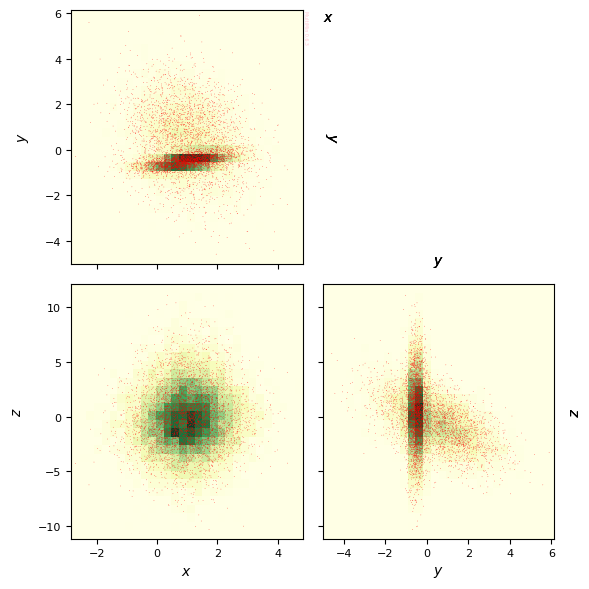

In [82]:
F = mn.FitCMND(ngauss=2, nvars=3)
F.fit_data(sample, advance=True)
G=F.plot_fit(
    props=["x","y","z"],
    hargs=dict(bins=30,cmap='YlGn'),
    sargs=dict(s=0.2,edgecolor='None',color='r'),
    figsize=3
)

plt.savefig('gallery/quickstart_fit_result_3d.png')


Much better!

Check the initial and final distributions:

For comparison, let's see the centers of the CMNDs, the original and the fitted one:

In [83]:
CMND.tabulate('distance')

,w,mu_1,mu_2,mu_3,sigma_1,sigma_2,sigma_3,rho_12,rho_13,rho_23
component,,,,,,,,,,
1,0.5,1.0,0.5,-0.5,1.064392,1.510773,2.077169,-0.211137,0.101191,-0.534075
2,0.5,1.0,-0.5,0.5,0.788611,0.241023,3.300000,0.539822,0.000000,0.000000


In [84]:
F.cmnd.tabulate('distance')

,w,mu_1,mu_2,mu_3,sigma_1,sigma_2,sigma_3,rho_12,rho_13,rho_23
component,,,,,,,,,,
2,0.497587,1.003249,-0.504171,0.456568,0.800826,0.241123,3.231114,0.551991,0.013112,0.008028
1,0.502413,1.027770,0.501464,-0.598576,1.041029,1.520268,2.096675,-0.226239,0.091688,-0.546810


The coincidence is expected.

Ahora veamos la función explícitamente:

In [85]:
code, cmnd = F.cmnd.get_function()

from multimin import nmd

def cmnd(X):

    mu1 = [1.02777, 0.501464, -0.598576]
    Sigma1 = [[1.083742, -0.358056, 0.200127], [-0.358056, 2.311214, -1.74296], [0.200127, -1.74296, 4.396044]]
    n1 = nmd(X, mu1, Sigma1)

    mu2 = [1.003249, -0.504171, 0.456568]
    Sigma2 = [[0.641322, 0.106588, 0.033927], [0.106588, 0.05814, 0.006255], [0.033927, 0.006255, 10.440096]]
    n2 = nmd(X, mu2, Sigma2)

    w1 = 0.502413
    w2 = 0.497587

    return (
        w1*n1
        + w2*n2
    )


Let's test it:

In [86]:
cmnd([0.2, 0.4, -0.2])

np.float64(0.00823390211190245)

Which is the same as:

In [ ]:
F.cmnd.pdf([0.2, 0.4, -0.2])

0.008233897474569148

## LaTeX outputs

For research papers or technical reports you may also see the function in LaTeX:

In [100]:
funcion, _ = F.cmnd.get_function(type='latex')

$$f(\mathbf{x}) = w_1 \, \mathcal{N}(\mathbf{x}; \boldsymbol{\mu}_1, \mathbf{\Sigma}_1) + w_2 \, \mathcal{N}(\mathbf{x}; \boldsymbol{\mu}_2, \mathbf{\Sigma}_2)$$

where

$w_1 = 0.502413$
$\boldsymbol{\mu}_1 = \left( \begin{array}{c}
        1.02777 \\
        0.501464 \\
        -0.598576
    \end{array}\right)$
$\mathbf{\Sigma}_1 = \left( \begin{array}{ccc}
        1.083742 & -0.358056 & 0.200127 \\
        -0.358056 & 2.311214 & -1.74296 \\
        0.200127 & -1.74296 & 4.396044
    \end{array}\right)$

$w_2 = 0.497587$
$\boldsymbol{\mu}_2 = \left( \begin{array}{c}
        1.003249 \\
        -0.504171 \\
        0.456568
    \end{array}\right)$
$\mathbf{\Sigma}_2 = \left( \begin{array}{ccc}
        0.641322 & 0.106588 & 0.033927 \\
        0.106588 & 0.05814 & 0.006255 \\
        0.033927 & 0.006255 & 10.440096
    \end{array}\right)$

Here the normal distribution is defined as:

$$\mathcal{N}(\mathbf{x}; \boldsymbol{\mu}, \mathbf{\Sigma}) = \frac{1}{\sqrt{(2\pi)^{{k}} \det \mathbf{

Or tabulate the properties in LaTeX:

In [99]:
latex_table = F.cmnd.tabulate(type='latex')

\begin{table*}
\begin{tabular}{lrrrrrrrrrr}
\hline
$k$ & $w$ & $\mu_1$ & $\mu_2$ & $\mu_3$ & $\sigma_1$ & $\sigma_2$ & $\sigma_3$ & $\rho_{12}$ & $\rho_{13}$ & $\rho_{23}$ \\
\hline
1 & 0.5024 & 1.028 & 0.5015 & -0.5986 & 1.041 & 1.52 & 2.097 & -0.2262 & 0.09169 & -0.5468 \\
2 & 0.4976 & 1.003 & -0.5042 & 0.4566 & 0.8008 & 0.2411 & 3.231 & 0.552 & 0.01311 & 0.008028 \\
\hline
\end{tabular}
\end{table*}


---

**MultiMin** - Multivariate Gaussian fitting

© 2026 Jorge I. Zuluaga